In [ ]:
# !pip install langdetect
# !pip install googletrans==4.0.0rc1
# !pip install googletrans==3.1.0a0 
# !pip install google-cloud-translate==2.0.1
# !pip install -U easynmt
# !pip install torch torchvision torchaudio
# !pip install bertopic
# !pip install pyLDAvis -qq
# !pip install -qq -U gensim
# !pip install seaborn -qq
# !python -m spacy download en_core_web_md -qq

In [2]:
# import libraries used
import pandas as pd
import numpy as np
import re               # regular expression library
import nltk
import time
import string
from nltk.corpus import stopwords
from nltk.tokenize import (RegexpTokenizer, word_tokenize)
from nltk.corpus import names
from nltk.corpus import wordnet as wn
from googletrans import Translator
from langdetect import detect
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from collections import Counter
import seaborn as sns
sns.set()
import spacy
import en_core_web_md
from gensim.utils import simple_preprocess

  # Data Pre-proprocess

  ### Load data

In [23]:
sgReviews = pd.read_csv('./SG/SG-reviews.csv')
thReviews = pd.read_csv('./TH/TH-reviews.csv')
trReviews = pd.read_csv('./TR/TR-reviews.csv')

sgList = pd.read_csv('./SG/SG-listings.csv')
thList = pd.read_csv('./TH/TH-listings.csv')
trList = pd.read_csv('./TR/TR-listings.csv')

### Add column: Country, for easy differentiation

In [ ]:
sg = []
i = 0
len(sgReviews)
while i < len(sgReviews):
    sg.append("Singapore")
    i +=1

sgReviews['Country'] = sg
len(sg)

In [ ]:
th = []
i = 0
len(thReviews)
while i < len(thReviews):
    th.append("Thailand")
    i +=1

thReviews['Country'] = th
len(th)

In [ ]:
tr = []
i = 0
len(trReviews)
while i < len(trReviews):
    tr.append("Turkey")
    i +=1

trReviews['Country'] = tr
len(tr)

  ### Data removal - remove irrelevant data

 ##### drop unecessary columns

In [27]:
# save columns in reviews dataframe that are needed for later analyses
sgReviewsTrim = sgReviews[['listing_id', 'comments', 'Country']]
thReviewsTrim = thReviews[['listing_id', 'comments', 'Country']]
trReviewsTrim = trReviews[['listing_id', 'comments', 'Country']]

# column name-change listing_id to id
sgReviewsTrim = sgReviewsTrim.rename(columns = {'listing_id':'id'})
thReviewsTrim = thReviewsTrim.rename(columns = {'listing_id':'id'})
trReviewsTrim = trReviewsTrim.rename(columns = {'listing_id':'id'})

In [28]:
# only include column in listing useful for later analyses
sgListingsTrim = sgList[['id', 'review_scores_rating', 'review_scores_cleanliness',
                        'review_scores_communication', 'review_scores_location',
                        'review_scores_value']]

thListingsTrim = thList[['id', 'review_scores_rating', 'review_scores_cleanliness',
                        'review_scores_communication', 'review_scores_location',
                        'review_scores_value']]

trListingsTrim = trList[['id', 'review_scores_rating', 'review_scores_cleanliness',
                        'review_scores_communication', 'review_scores_location',
                        'review_scores_value']]

In [ ]:
# merge reviews and listings dataframes
sgTots = pd.merge(sgReviewsTrim, sgListingsTrim, on = 'id')
thTots = pd.merge(thReviewsTrim, thListingsTrim, on = 'id')
trTots = pd.merge(trReviewsTrim, trListingsTrim, on = 'id')

# concat the data into "result"
result = pd.concat([sgTots, thTots, trTots], axis = 0)
# result = pd.concat([sgTots, thTots, trTots])
result.head(-10)

  ##### drop null values & duplicates

In [30]:
print("Before dropna: ", len(result))
# dropna function will remove any NA value from all the columns
result = result.dropna(axis=0, how='any')
print("After dropna: ", len(result))

print("Before drop duplicates: ", len(result))
result = result.drop_duplicates(subset=["comments"])
print("After drop duplicates: ", len(result))

Before dropna:  890121
After dropna:  889722
Before drop duplicates:  889722
After drop duplicates:  846925


  ##### remove irrelevant data
  such as: " " or "-" or "--" or "/" or "." or "123"

In [ ]:
ls = [" ", "-", "--", "/", ".", "123"]
for i in ls:
    result = result.drop(result[result["comments"] == i].index)
len(result)

  ##### remove automated reviews

In [ ]:
# create a column to check whether a review is an automated posting (yes, no)
def autopost(x):
    if 'an automated posting' in x:
        return 'yes'
    else:
        return 'no'
result['auto_posting'] = result['comments'].apply(autopost)
result = result.loc[result['auto_posting']=='no']
len(result)

  ##### Note: read before proceed
  based on the dataframe "result" above, the numbers of the data is not valid: </br>
  ![image.png](attachment:image.png)
  - see num of last row: 511612</br>
  - see actual number of rows: 846706   846724</br>
  <b>before proceed to translation, save the dataframe into CSV file, and open in EXCEL to smoothen the numbers.</br>
  </br>
  <b> **NOTE** after deep into this project, i found a way to remove these index numbers when saving to CSV. However, I didn't change the code, because it doesn't matter anymore. </br>
  </br>
  <b>But the code is this: result.to_csv("filename.csv", index=False)

In [ ]:
# save df to csv
result.to_csv("data.csv")
# ## code below is for removing index number when saving data to CSV
# result.to_csv("data.csv", index="False")

  ### translate non-english to english

In [ ]:
# load records from data
data = pd.read_csv("data1.csv")
data = data.drop(["Unnamed: 0", "auto_posting"], axis=1)

rev = []
data.head(-10)

In [ ]:
# translate reviews
rev2 = []
translate = Translator()
for i in data["comments"].iloc[27540:33824]:
    translate.raise_Exception = True
    time.sleep(0.3)
    try:
        detect = translate.detect(i)
    except:
        detect = translate.detect(i)
    try: 
        if detect.lang == "en":
            rev2.append(i)
        else:
            translation = translate.translate(i)

            print("before trans: " + i)
            rev2.append(translation.text)
            print("after trans: " + translation.text)
    except:
        rev2.append("NonEng")

In [ ]:
# print(data["comments"].iloc[199242:199252])
print(data["comments"].iloc[27536:33824])

In [ ]:
# to view the data stored in the "rev2" list, before appending into "rev"
# so as not to mess up data in "rev"
print(len(rev2))
for i in rev2:
    print(i)

In [ ]:
# to append the translated list: "rev2" into the "rev"
print("rev: ", len(rev))
print("rev2: ", len(rev2))
for j in rev2:
    rev.append(j)
    print(j)
print(len(rev))
# print(len(rev) + 33824)
# print(len(thRev) + 358647)

In [ ]:
# for translated reviews' VERSION CONTROL
revv = pd.DataFrame(rev)
revv.to_csv("Rev.csv")

In [ ]:
# the above code cells are needed, because the records are too huge (takes long time), if wifi down - translation'll be interupted, 
# therefore VERSIONING of the csv file is needed to track the translation.

# then i manually copy-paste the translated data to the original data thru EXCEL
# in the file "data1 - Copy.csv"

 #### remove duplicates again, after translate

In [ ]:
data1Cop = pd.read_csv(r"data1 - Copy.csv", header=0)
data = pd.read_csv(r"data1.csv", header=0)
data1Cop.head()
data1 = data1Cop[['id', 'comments', 'transComments']]
data1

In [ ]:
completeD = pd.merge(data, data1, on = ["comments", "id"])
completeD

In [ ]:
print(len(completeD))
completeD = completeD.drop_duplicates(subset=["transComments"])
print("Data after drop_dup for translated: ", len(completeD))

In [ ]:
completeD.to_csv("completeD.csv")

# Data Pre-process (after Sentiment Analysis)

In [ ]:
data = pd.read_csv("completeD.csv").drop(["Unnamed: 0"], axis=1)

### Remove Punctuation & Change Lowercase

In [184]:
# Simplification of of the data for Exploratary Data analysis
# remove punctuation, change to lowercase

data['cleanedTransCom'] = [re.sub(r'[,\.!?]', '', str(x)) for x in data['transComments']]
data['cleanedTransCom'] = [re.sub(r'http\S+', '', str(x)) for x in data['cleanedTransCom']]
data['cleanedTransCom'] = [re.sub(r'[^A-Za-z]+', ' ', str(x)) for x in data['cleanedTransCom']]
data['cleanedTransCom'] = data['cleanedTransCom'].map(lambda x: x if type(x)!=str else x.lower())

### Tokenise & Lemmatise

In [183]:
# tokenise & lemmatise & stopwords removal on the translated, cleaned comments for WORDCLOUD purpose
nltk.download('stopwords')
nltk.download('wordnet')
def clean_comments(text):
    
    words = nltk.word_tokenize(text)    
    # words2 = nltk.tokenize.WhitespaceTokenizer()
    
    stopwordsVocab = stopwords.words('english')
    moreTOExclue = ['br', 's', 'd', 'be']
    stopwordsVocab.extend(moreTOExclue)
    
    filtered_text = [word for word in words if word not in stopwordsVocab]

    lemmatizer = nltk.stem.WordNetLemmatizer()
    lemmatized_text = [lemmatizer.lemmatize(token) for token in filtered_text]
    return lemmatized_text

[nltk_data] Downloading package stopwords to C:\Users\Gead
[nltk_data]     Kee\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\Gead
[nltk_data]     Kee\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [185]:
data['tokensForWordcloud'] = data["cleanedTransCom"].apply(clean_comments)

  #### Remove Unwanted Tags like: adverb, pronoun, conjunction, etc.

In [39]:
nlp = en_core_web_md.load()

# Tags I want from the text
allowed_postags = ['NOUN', 'ADJ', 'VERB']
tokens = []

for i in nlp.pipe(data['cleanedTransCom']):
   proj_tok = [token.lemma_ for token in i if token.pos_ in allowed_postags]
   tokens.append(proj_tok)

tokens

[['room', 'clean', 'tidy', 'bed', 'comfortable'],
 ['good',
  'space',
  'interesting',
  'home',
  'quiet',
  'location',
  'lovely',
  'park',
  'road',
  'rare',
  'nice',
  'place',
  'big',
  'group'],
 ['comfortable',
  'place',
  'kind',
  'helpful',
  'woman',
  'nice',
  'accommodation',
  'tourism',
  'site',
  'place',
  'beautiful',
  'calm',
  'maid',
  'helpful',
  'br',
  'nice',
  'trip',
  'beautiful',
  'singapore'],
 ['mature',
  'age',
  'traveller',
  'night',
  'warm',
  'reception',
  'arrival',
  'usual',
  'case',
  'short',
  'taxi',
  'ride',
  'city',
  'centre',
  'near',
  'bus',
  'stop',
  'train',
  'station',
  'first',
  'train',
  'ticket',
  'excellent',
  'customer',
  'bedroom',
  'air',
  'clean',
  'departure',
  'belinda',
  'gracious',
  'helpful',
  'recommendation',
  'time',
  'concerned',
  'good',
  'town',
  'visitor'],
 ['great',
  'host',
  'house',
  'room',
  'spotless',
  'clean',
  'presentable',
  'comfortable',
  'location',
  'c

In [40]:
stop_words = stopwords.words('english')
stop_words.extend(["accomodation", "place", "re", "edu", "use", "br", "s","d", "be", "b", "comment",
                   "nil", "say", "stay", "appartment", "thank", "take" "day", "airbnb", "airbnbs",
                   "ve", "bk", "pk", "belinda"])

def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]

tokens = remove_stopwords(tokens)

In [41]:
# to ensure no empty values
data = data.dropna(axis=0, how='any')

# save data as csv file for version control.
data.to_csv("cleanedComp.csv")

# save last column "tokens" as text file, for easy retrieve during LDA topic modelling
with open("testFile.txt", "w", encoding = "utf-8", errors = "ignore") as file:
    file.write(str(tokens))

In [ ]:
# ## compressed csv file, for smaller file size when push to GitHub & deployed
# data.to_csv("cleanedComp.bz2", compression="bz2")

# data = pd.read_csv("cleanedComp.bz2", compression="bz2")

  # Data Understanding

In [13]:
data = pd.read_csv("../datasetsUsed/cleanedComp.csv").drop(["Unnamed: 0"], axis=1)

In [6]:
# to segment the data by Country
sing = data[(data['Country'] == "Singapore")]
print("Sin: ", len(sing))

thai = data[(data['Country'] == "Thailand")]
print("Tha: ", len(thai))

turk = data[(data['Country'] == "Turkey")]
print("Tur: ", len(turk))

Sin:  33729
Tha:  322908
Tur:  483704


### WordCloud

#### Singapore's cloud

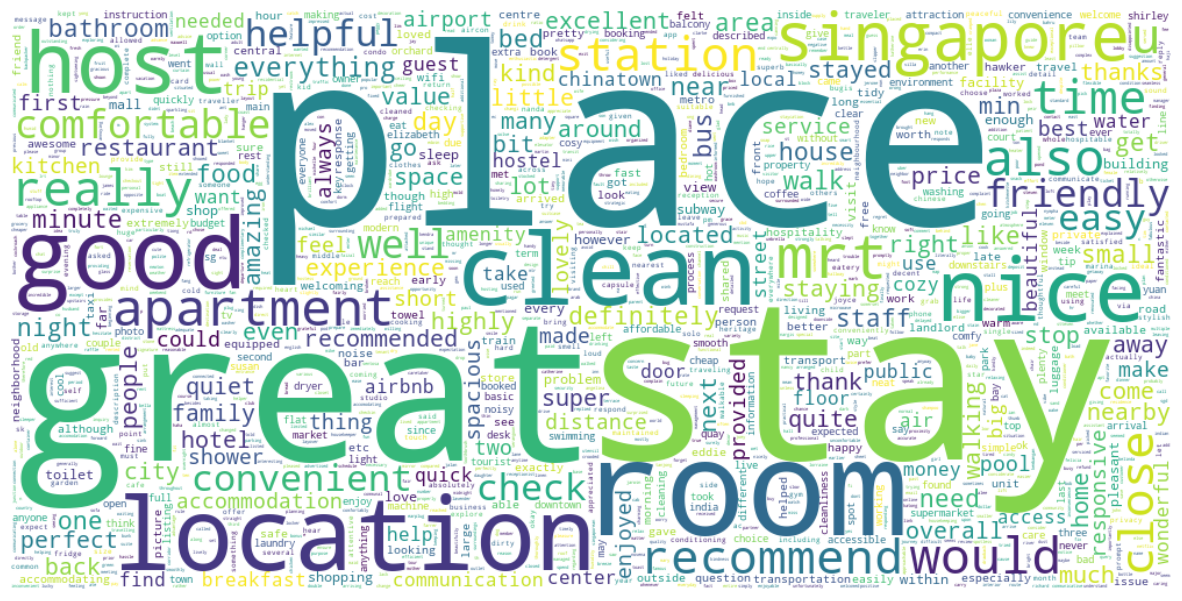

In [34]:
%matplotlib inline

# split sentences to get individual words
s = []
for line in sing['tokensForWordcloud']: 
    s.extend(line)
    
# create a word frequency dictionary
wordfreq = Counter(s)

# plot Word Cloud with word frequencies
wordcloud = WordCloud(
    width=1000, height=500,
    background_color ='white',
    max_words = 2000,
    stopwords = stopwords.words('english'),
    contour_width=3
   ).generate_from_frequencies(wordfreq)
plt.figure(figsize = (12,6))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis("off")
plt.show()

#### Thailand's cloud

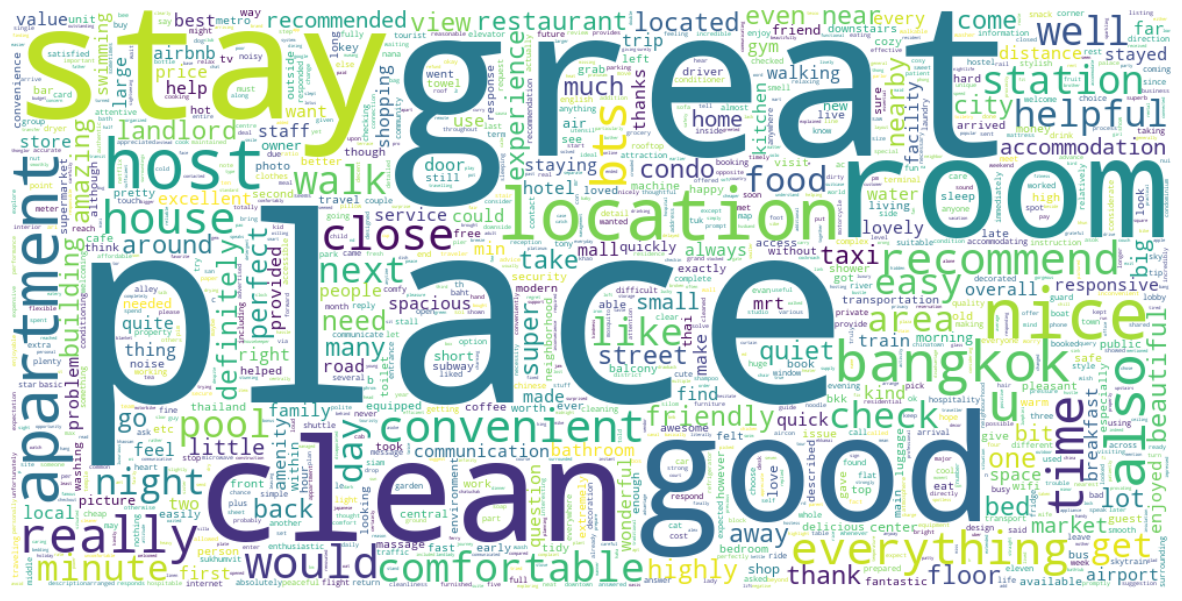

In [35]:
# split sentences to get individual words
s = []
for line in thai['tokensForWordcloud']: 
    s.extend(line)
    
# create a word frequency dictionary
wordfreq = Counter(s)

# plot Word Cloud with word frequencies
wordcloud = WordCloud(
    width=1000, height=500,
    background_color ='white',
    max_words = 2000,
    stopwords = stopwords.words('english'),
    contour_width=3
   ).generate_from_frequencies(wordfreq)
plt.figure(figsize = (12,6))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis("off")
plt.show()

#### Turkey's cloud

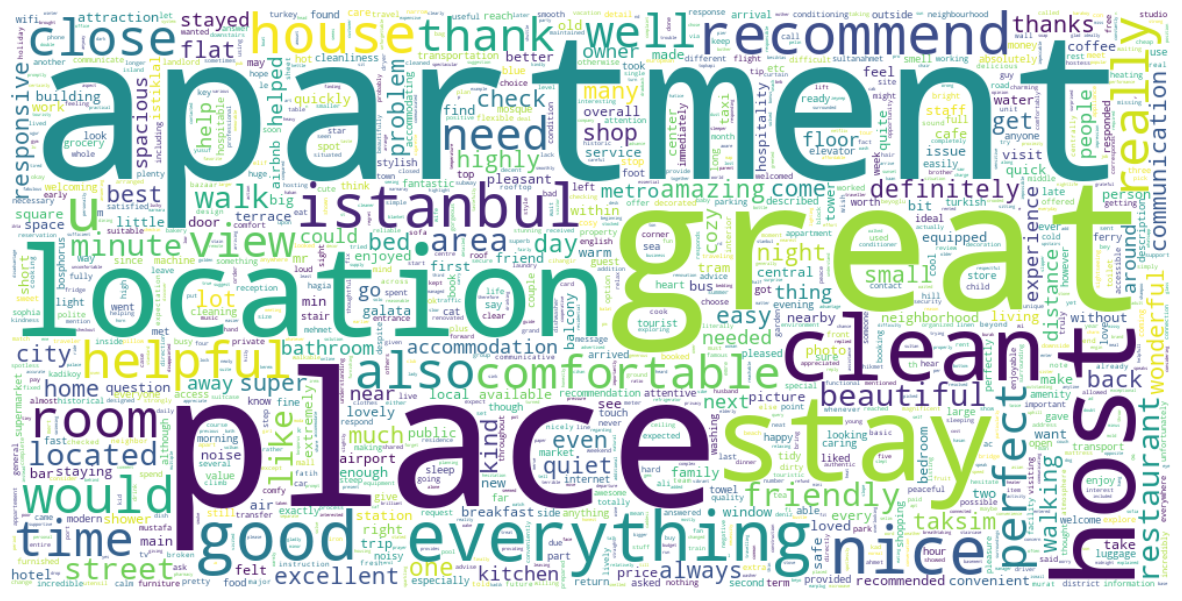

In [36]:
# split sentences to get individual words
s = []
for line in turk['tokensForWordcloud']: 
    s.extend(line)
    
# create a word frequency dictionary
wordfreq = Counter(s)

# plot Word Cloud with word frequencies
wordcloud = WordCloud(
    width=1000, height=500,
    background_color ='white',
    max_words = 2000,
    stopwords = stopwords.words('english'),
    contour_width=3
   ).generate_from_frequencies(wordfreq)
plt.figure(figsize = (12,6))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis("off")
plt.show()